In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [9]:

df = pd.read_csv("weatherHistory.csv")

print("Veri boyutu:", df.shape)
df.head()

Veri boyutu: (96453, 12)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [10]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [11]:

# Tarihi datetime'a çevir
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], errors="coerce")

# Loud Cover tamamen 0 → faydasız → drop
if df["Loud Cover"].nunique() == 1:
    df.drop(columns=["Loud Cover"], inplace=True)

# Eksik değer kontrolü
print(df.isnull().sum())

# Eksik değer varsa → drop
df.dropna(inplace=True)
print("Temizlenen veri boyutu:", df.shape)


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
Temizlenen veri boyutu: (95936, 11)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12164\2009742653.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], errors="coerce")


In [12]:

label_cols = ["Summary", "Precip Type", "Daily Summary"]

encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,197
1,2006-04-01 01:00:00+02:00,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,197
2,2006-04-01 02:00:00+02:00,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197
3,2006-04-01 03:00:00+02:00,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,197
4,2006-04-01 04:00:00+02:00,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,197


In [13]:

y = df["Temperature (C)"]
X = df.drop(columns=["Temperature (C)", "Formatted Date"])  
# Tarih geleceği tahmin etmez → çıkarıyoruz


In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

In [17]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("=== LINEAR REGRESSION SONUÇLARI ===")
print("R2 Score:", r2)
print("MSE:", mse)

=== LINEAR REGRESSION SONUÇLARI ===
R2 Score: 0.9901578997993566
MSE: 0.8974260331289451


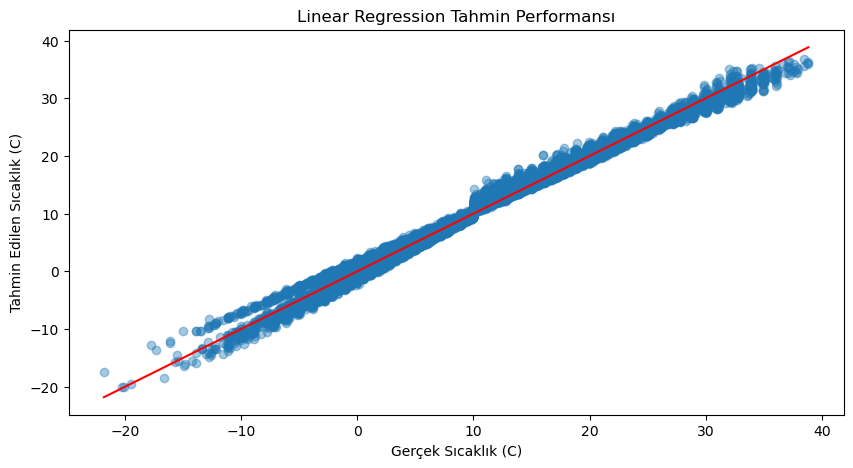

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Gerçek Sıcaklık (C)")
plt.ylabel("Tahmin Edilen Sıcaklık (C)")
plt.title("Linear Regression Tahmin Performansı")
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color="red")
plt.show()